<a href="https://colab.research.google.com/github/MEloisa/clase-git/blob/master/dogsVScats_Deep_learning_Classsification_Problem_Color_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dogs VS cats - Color Images Classification Problem, Deep Learning

In this assignment we will face an image classification problem, trying to tell apart images of dogs and images of cats. 

In [17]:
!pip install -U tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)


In [18]:
from __future__ import absolute_import

In [19]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Data Loading and Processing

In [21]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [22]:
!find $PATH -type d -print

/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [23]:
base_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir =os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [25]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))  
num_dogs_val = len(os.listdir(validation_dogs_dir))  

total_train = num_cats_tr + num_dogs_tr  
total_val = num_cats_val + num_dogs_val  


In [27]:
print(num_cats_tr)
print(num_dogs_tr)
print(num_cats_val)
print(num_dogs_val)

1000
1000
500
500


## Setting model Parameters

In [29]:
BATCH_SIZE= 100 #Number of trainning examples to process before update model variables
IMG_SHAPE= 150 #Pixels

## Data Preparation

In [30]:
train_image_generator= ImageDataGenerator(rescale=1./255)
validation_image_generator= ImageDataGenerator(rescale=1./255)

In [31]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [34]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


In [37]:
sample_training_images, _ = next (train_data_gen)

In [38]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

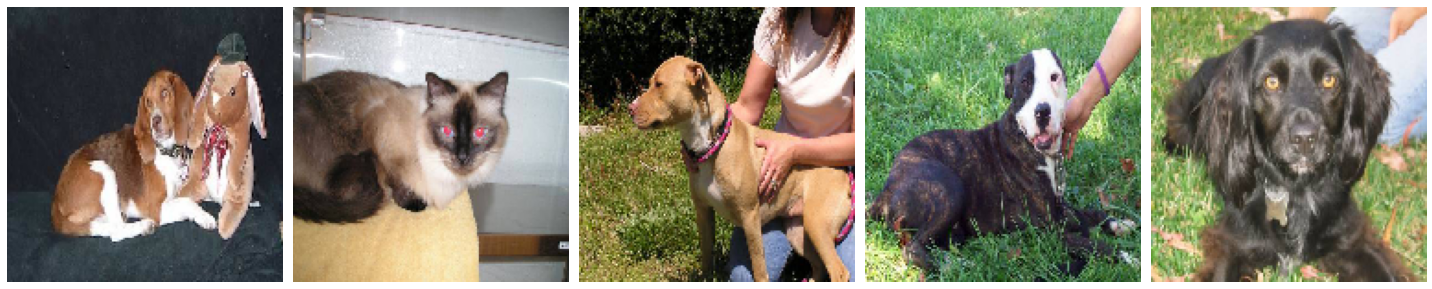

In [42]:

plotImages(sample_training_images[:5])

##  Creating a model

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

## Compile the model

In [45]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Train the model

In [49]:
EPOCHS= 10

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float (BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float (BATCH_SIZE)))
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 40s 512ms/step - loss: 0.8399 - accuracy: 0.4997 - val_loss: 0.6780 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 10s 503ms/step - loss: 0.6698 - accuracy: 0.5111 - val_loss: 0.6443 - val_accuracy: 0.5370
Epoch 3/10
20/20 [==============================] - 10s 497ms/step - loss: 0.6234 - accuracy: 0.5865 - val_loss: 0.5907 - val_accuracy: 0.7110
Epoch 4/10
20/20 [==============================] - 10s 491ms/step - loss: 0.5550 - accuracy: 0.6992 - val_loss: 0.5738 - val_accuracy: 0.6700
Epoch 5/10
20/20 [==============================] - 10s 490ms/step - loss: 0.4732 - accuracy: 0.7450 - val_loss: 0.5534 - val_accuracy: 0.6890
Epoch 6/10
20/20 [==============================] - 10s 492ms/step - loss: 0.4205 - accuracy: 0.7911 - val_loss: 0.5886 - val_accuracy: 0.6540
Epoch 7/10
20/20 [==============================] - 10s 492ms/step - loss: 0.4106 - accuracy: 0.7883 - val_loss: 0.5811 - val_accuracy: 0.7300

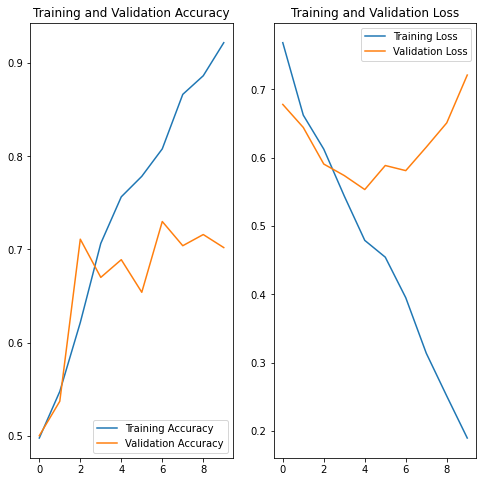

In [51]:
#Visualizating training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(EPOCHS)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
# overfitting

In [ ]:
#Another popular approach when working with binary classification problems, is to use a classifier that consists of a Dense layer with 1 output unit and a sigmoid activation function

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***

<font color=#259b4c>
    
You can further improve your results by applying one or more of the following strategies:
- Keep apart a portion of the training data as a **validation set**. Then use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss of these validation data, and stop when training when after a number of iterations such loss has not decreased.
- Use **image augmentation techniques** to artifically create new training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.
- Make use of a pre-trained large network, building your network on top of it. You can find some examples in the [Keras Applications](https://keras.io/applications/) page. Be careful when freezing pre-trained networks that include [BatchNormalization layers](http://blog.datumbox.com/the-batch-normalization-layer-of-keras-is-broken/), such as ResNet.
- Make use of **metamodelling techniques** to select the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. You can do those by using the <a href="https://keras.io/scikit-learn-api/">KerasClassifier</a> wrapper. Even better, you can mix KerasClassifier with an advanced search method such as [BayesSearch](https://scikit-optimize.github.io/#skopt.BayesSearchCV), included in the [scikit-optimize](https://scikit-optimize.github.io/) library. If you get memory problems try to free GPU memory before building each network by [clearing the tensorflow session](https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu).


***